# Introduction

In [ ]:
"""
What? Random forest for classification plotted ste-by-step

The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely 
overfit on part of the data. If we build many trees, all of which work well and overfit in different ways, we can
reduce the amount of overfitting by averaging their results.

https://github.com/amueller/introduction_to_ml_with_python
Guido, Sarah, and Andreas Müller. Introduction to machine learning with python. Vol. 282. O'Reilly Media, 2016.
"""

# Import libraries/modules

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from matplotlib import rcParams
rcParams['figure.figsize'] = 14, 8
rcParams['font.size'] = 15

# Read-in the dataset

In [4]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

# Fit random forest

In [7]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


# Feature imoprtance

In [18]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

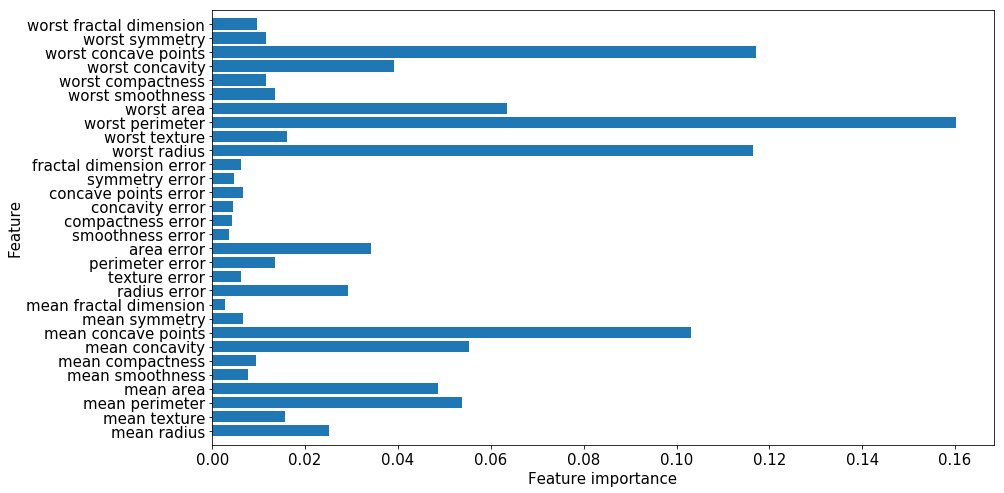

In [24]:
plot_feature_importances_cancer(forest)

In [ ]:
"""
The random forest gives nonzero importance to many more features than the single tree.
The randomness in building the random forest forces the algorithm to consider many possible
explanations, the result being that the random forest captures a much broader picture of the data 
than a single tree.
"""